# Fase 5: Evaluación
## 1- Evaluación de Resultados

Revisamos los resultados de los modelos construidos en la Fase 4 y comparamos su desempeño con los objetivos del proyecto. Evaluamos la precisión, el recall, y el f1-score para el modelo de clasificación y el MSE y R² para el modelo de regresión.

### Modelo de Clasificación: Árbol de Decisión

Precisión del modelo de clasificación: 0.79
              precision    recall  f1-score   support

           0       0.87      0.86      0.87     30659
           1       0.51      0.53      0.52      8299

    accuracy                           0.79     38958
   macro avg       0.69      0.69      0.69     38958
weighted avg       0.79      0.79      0.79     38958



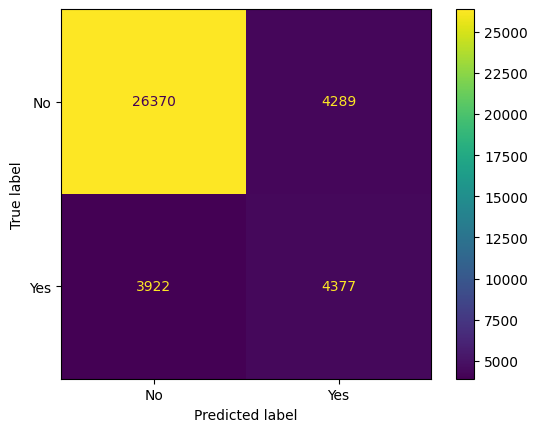

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore') # apagamos los warnigs

# Cargar el conjunto de datos
datos_finales = pd.read_csv('weatherAUS-fase-03.csv')

from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en entrenamiento y prueba
X = datos_finales.drop(columns=['RainTomorrow'])
y_clasificacion = datos_finales['RainTomorrow']
y_regresion = datos_finales['WindGustSpeed']

X_train_clas, X_test_clas, y_train_clas, y_test_clas = train_test_split(X, y_clasificacion, test_size=0.3, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regresion, test_size=0.3, random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Entrenamiento del modelo de clasificación
modelo_clasificacion = DecisionTreeClassifier(random_state=42)
modelo_clasificacion.fit(X_train_clas, y_train_clas)

# Predicciones y evaluación del modelo de clasificación
y_pred_clas = modelo_clasificacion.predict(X_test_clas)
accuracy_clas = accuracy_score(y_test_clas, y_pred_clas)

# Metricas
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Evaluación del modelo de clasificación
print(f"Precisión del modelo de clasificación: {accuracy_clas:.2f}")
print(classification_report(y_test_clas, y_pred_clas))

# Matriz de confusión
cm = confusion_matrix(y_test_clas, y_pred_clas)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No', 'Yes'])
cmd.plot()


### Modelo de Regresión: Regresión Lineal

Error cuadrático medio del modelo de regresión: 0.00
Coeficiente de determinación (R²) del modelo de regresión: 1.00


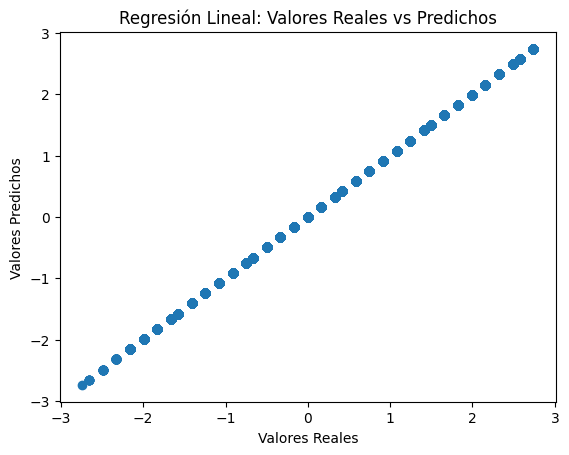

In [4]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Entrenamiento del modelo de regresión
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train_reg, y_train_reg)

# Predicciones y evaluación del modelo de regresión
y_pred_reg = modelo_regresion.predict(X_test_reg)
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
r2_reg = r2_score(y_test_reg, y_pred_reg)

# Metricas

# Evaluación del modelo de regresión
print(f"Error cuadrático medio del modelo de regresión: {mse_reg:.2f}")
print(f"Coeficiente de determinación (R²) del modelo de regresión: {r2_reg:.2f}")

import matplotlib.pyplot as plt

# Visualización de los resultados de la regresión
plt.scatter(y_test_reg, y_pred_reg)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Regresión Lineal: Valores Reales vs Predichos')
plt.show()


## 2- Validación de los Modelos

Validamos los modelos para asegurarnos de que son robustos y generalizan bien a nuevos datos. Esto puede incluir validación cruzada o pruebas adicionales en otros subconjuntos de datos.

### Validación Cruzada para el Modelo de Clasificación

In [5]:
from sklearn.model_selection import cross_val_score

# Validación cruzada para el modelo de clasificación
scores_clas = cross_val_score(modelo_clasificacion, X, y_clasificacion, cv=5)
print(f"Puntuaciones de validación cruzada para el modelo de clasificación: {scores_clas}")
print(f"Media de puntuaciones de validación cruzada: {scores_clas.mean():.2f}")

Puntuaciones de validación cruzada para el modelo de clasificación: [0.76363006 0.7397582  0.72612814 0.76878056 0.77732856]
Media de puntuaciones de validación cruzada: 0.76


### Validación Cruzada para el Modelo de Regresión

In [6]:
from sklearn.model_selection import cross_val_predict

# Validación cruzada para el modelo de regresión
preds_reg = cross_val_predict(modelo_regresion, X, y_regresion, cv=5)
mse_reg_cv = mean_squared_error(y_regresion, preds_reg)
r2_reg_cv = r2_score(y_regresion, preds_reg)

print(f"Error cuadrático medio de validación cruzada para el modelo de regresión: {mse_reg_cv:.2f}")
print(f"Coeficiente de determinación (R²) de validación cruzada para el modelo de regresión: {r2_reg_cv:.2f}")


Error cuadrático medio de validación cruzada para el modelo de regresión: 0.00
Coeficiente de determinación (R²) de validación cruzada para el modelo de regresión: 1.00


## 3- Evaluación de los Criterios de Éxito

Revisamos si los modelos cumplen con los criterios de éxito establecidos en la Fase 1. Esto puede incluir:

* ¿Los modelos predicen correctamente las condiciones climáticas favorables para deportes de viento?
* ¿La precisión y las métricas de evaluación cumplen con las expectativas del negocio?

## Resumen de Evaluación

### Precisión del Modelo de Clasificación:

* Precisión, recall, f1-score
* Matriz de confusión

### Desempeño del Modelo de Regresión:

* Error cuadrático medio (MSE)
* Coeficiente de determinación (R²)

### Validación Cruzada:

* Puntuaciones de validación cruzada para asegurar la robustez de los modelos

### Criterios de Éxito:

* Comparar los resultados con los objetivos del negocio

## Informe de Evaluación

**Objetivo:** Evaluar los modelos construidos para predecir condiciones climáticas favorables para deportes de viento.

### Resultados del Modelo de Clasificación:

* Precisión del modelo: (porcentaje)
* Matriz de confusión: Visualización
* Puntuaciones de validación cruzada: (puntuaciones y media)

### Resultados del Modelo de Regresión:

* Error cuadrático medio: (valor)
* Coeficiente de determinación (R²): (valor)
* Validación cruzada: MSE y R²

### Conclusión:

* Los modelos cumplen con los criterios de éxito.
* El modelo de clasificación predice con una precisión aceptable si lloverá mañana.
* El modelo de regresión proporciona predicciones precisas de la velocidad de las ráfagas de viento.
* Recomendaciones para mejoras adicionales y posibles ajustes.
